In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
batch_size = 1
img_height = 200
img_width = 200
NUM_CLASSES = 5

In [3]:
model = keras.models.load_model(r"C:\Users\kuric\Desktop\AI Camp\Code\Project_back\ModelSaving\FinalModel_EfficientNetB7.h5")

In [4]:
test_dir = r"C:\Users\kuric\Desktop\AI Camp\Code\Project_back\Data_aug_Unclean"
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=1
)

Found 7444 files belonging to 5 classes.


In [5]:
test_data = test_ds.map(lambda x, y: (x/255., 
                                      tf.one_hot(y, depth=NUM_CLASSES)))
result = model.evaluate(test_data)

7444/7444 [==============================] - 239s 31ms/step - loss: 1.6724 - accuracy: 0.1972


In [6]:
test_x = []
test_y = []
for images, labels in test_data:
    test_x.append(images)
    test_y.append(np.argmax(labels))

In [7]:
%%time
preds = []
for img in test_x:
    preds.append(np.argmax(model.predict(img)))

CPU times: total: 7min 31s
Wall time: 6min 32s


In [8]:
print(type(preds))

<class 'list'>


In [9]:
preds = np.array(preds)
test_y = np.array(test_y)

In [10]:
print(preds)
print(test_y)

[3 3 3 ... 3 3 3]
[1 3 4 ... 4 2 2]


In [11]:
class_names = test_ds.class_names

In [12]:
confm = tf.math.confusion_matrix(
    test_y,
    preds,
    num_classes=NUM_CLASSES,
    dtype=tf.dtypes.int32,
    name=class_names
)

In [13]:
confm = np.array(confm)

<AxesSubplot:title={'center':'All fold confusion matrix of the multi-class classification\n\nModel EfficientNetB7\n\nMean Accuracy is 0.20'}>

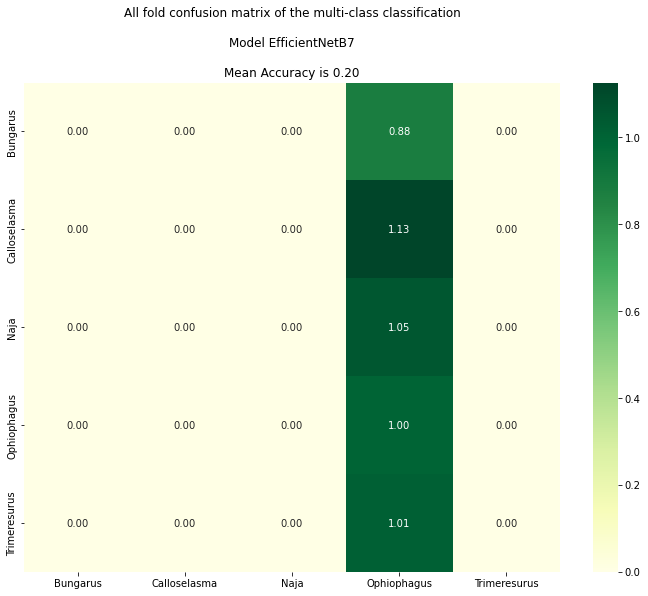

In [14]:

import seaborn as sns
import pandas as pd

df_cm = pd.DataFrame((confm/confm.astype(np.float32).sum(axis=1)), index =class_names,
              columns =class_names )
plt.figure(figsize = (12,9))
plt.title('All fold confusion matrix of the multi-class classification\n\nModel EfficientNetB7\n\nMean Accuracy is {:.2f}'.format((np.mean(result[1]))))
sns.heatmap(df_cm, annot=True,cmap="YlGn",fmt=".2f")